In [22]:
import pandas as pd

# Load data
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

# Basic info
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nTrain columns:\n", train.columns.tolist())
print("\nFirst 3 rows:\n", train.head(3))

Train shape: (84960, 17)
Test shape: (4530, 5)

Train columns:
 ['ID', 'Year', 'Month', 'Day', 'kingdom', 'latitude', 'longitude', 'Avg_Temperature', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 'Feels_Like_Temperature_Range', 'Radiation', 'Rain_Amount', 'Rain_Duration', 'Wind_Speed', 'Wind_Direction', 'Evapotranspiration']

First 3 rows:
    ID  Year  Month  Day   kingdom   latitude  longitude  Avg_Temperature  \
0   1     1      4    1   Arcadia  24.280002 -37.229980            25.50   
1   2     1      4    1  Atlantis  22.979999 -37.329990           299.65   
2   3     1      4    1    Avalon  22.880000 -37.130006            26.30   

   Avg_Feels_Like_Temperature  Temperature_Range  \
0                       30.50                8.5   
1                      305.15                5.9   
2                       31.50                5.2   

   Feels_Like_Temperature_Range  Radiation  Rain_Amount  Rain_Duration  \
0                          10.3      22.52        58.89         

Missing values in train:
 ID                              0
Year                            0
Month                           0
Day                             0
kingdom                         0
latitude                        0
longitude                       0
Avg_Temperature                 0
Avg_Feels_Like_Temperature      0
Temperature_Range               0
Feels_Like_Temperature_Range    0
Radiation                       0
Rain_Amount                     0
Rain_Duration                   0
Wind_Speed                      0
Wind_Direction                  0
Evapotranspiration              0
dtype: int64
Train describe:
                  ID          Year         Month           Day      latitude  \
count  84960.000000  84960.000000  84960.000000  84960.000000  84960.000000   
mean   42480.500000      4.610876      6.666667     15.735876     24.003334   
std    24525.983772      2.239331      3.402793      8.802867      0.798622   
min        1.000000      1.000000      1.000000   

/var/folders/tr/fzn4ndsx0j3dlwk6s_7rqfkh0000gn/T/ipykernel_12588/1846442927.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['date'] = pd.to_datetime(


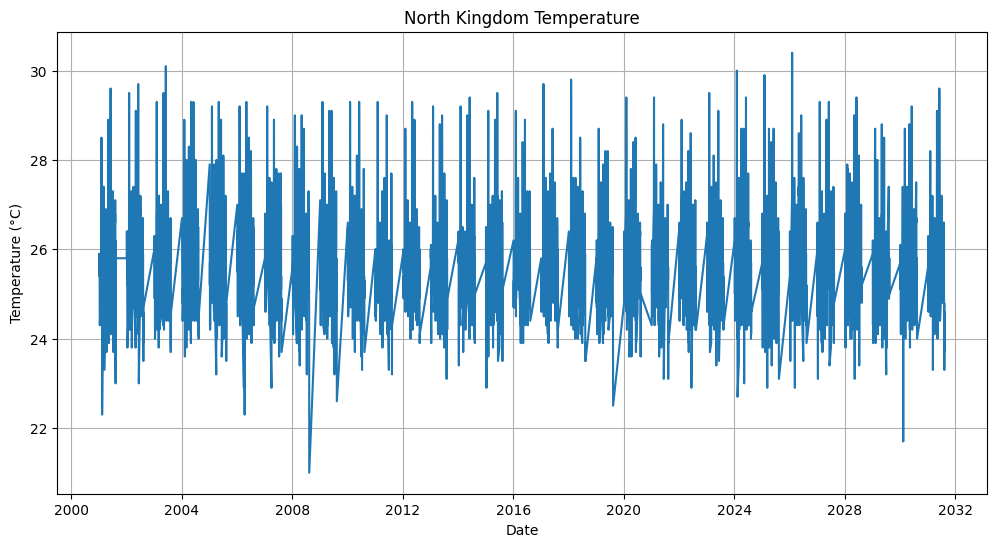

In [20]:
# Check missing values
print("Missing values in train:\n", train.isnull().sum())

# Basic stats
print("Train describe:\n", train.describe())

# Visualize temperature over time - FIXED VERSION
import matplotlib.pyplot as plt

# CORRECT DATE CREATION (3 methods you can try)

# Method 1: Combine columns as strings
train['date'] = pd.to_datetime(
    train['Year'].astype(str) + '-' + 
    train['Month'].astype(str) + '-' + 
    train['Day'].astype(str)
)

plt.figure(figsize=(12,6))

# Filter data first for cleaner code
north_data = train[train['kingdom']=='Arcadia'].sort_values('date')

plt.plot(north_data['date'], north_data['Avg_Temperature'])
plt.title('North Kingdom Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


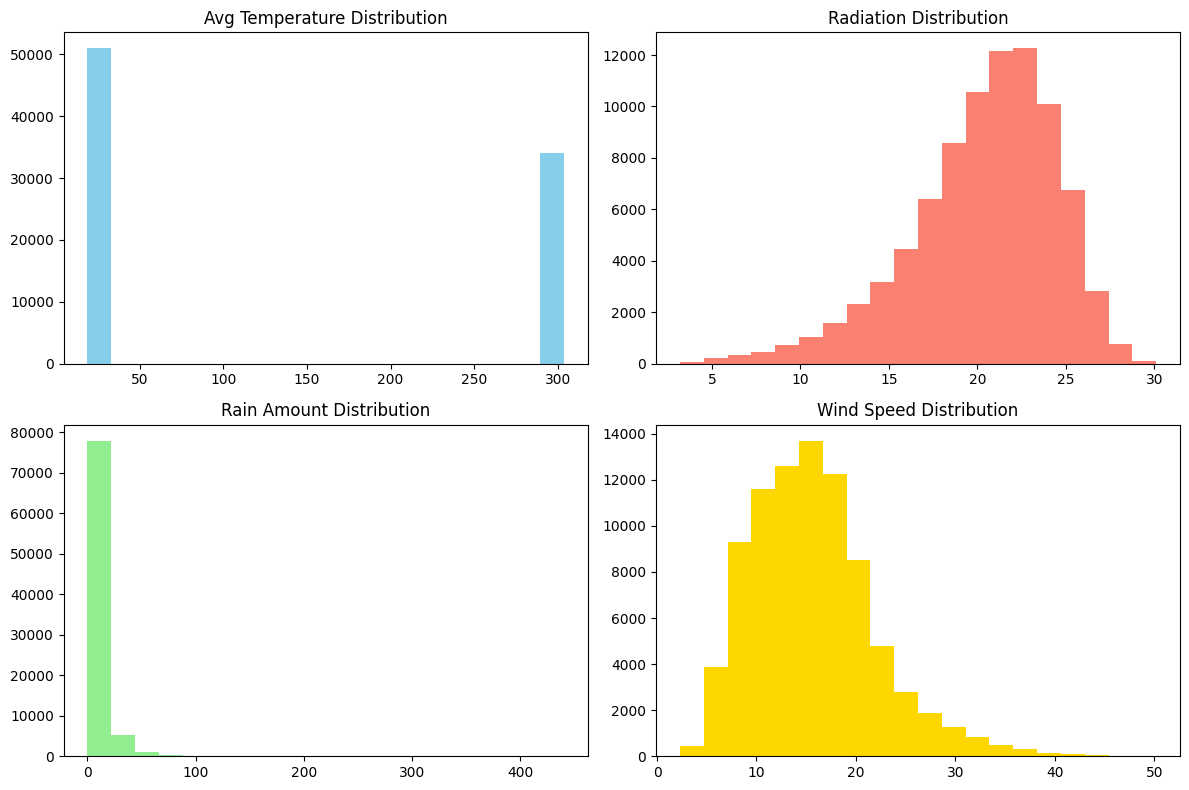

In [23]:
import matplotlib.pyplot as plt

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Temperature
axes[0,0].hist(train['Avg_Temperature'], bins=20, color='skyblue')
axes[0,0].set_title('Avg Temperature Distribution')

# Radiation
axes[0,1].hist(train['Radiation'], bins=20, color='salmon')
axes[0,1].set_title('Radiation Distribution')

# Rain Amount
axes[1,0].hist(train['Rain_Amount'], bins=20, color='lightgreen')
axes[1,0].set_title('Rain Amount Distribution')

# Wind Speed
axes[1,1].hist(train['Wind_Speed'], bins=20, color='gold')
axes[1,1].set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

🔍 ========== STARTING COMPREHENSIVE EDA ==========

📋 BASIC INFO:
Shape: (84960, 17)

Columns:
ID                                int64
Year                              int64
Month                             int64
Day                               int64
kingdom                          object
latitude                        float64
longitude                       float64
Avg_Temperature                 float64
Avg_Feels_Like_Temperature      float64
Temperature_Range               float64
Feels_Like_Temperature_Range    float64
Radiation                       float64
Rain_Amount                     float64
Rain_Duration                     int64
Wind_Speed                      float64
Wind_Direction                    int64
Evapotranspiration              float64
dtype: object

🎯 UNIQUE VALUES PER COLUMN:

ID (int64): 84960 uniques

Year (int64): 8 uniques
  Values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]


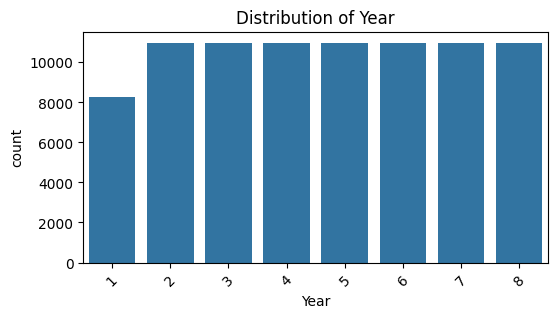


Month (int64): 12 uniques

Day (int64): 31 uniques

kingdom (object): 30 uniques

latitude (float64): 17 uniques

longitude (float64): 10 uniques
  Values: [np.float64(-37.72998), np.float64(-37.630006), np.float64(-37.53), np.float64(-37.32999), np.float64(-37.22998), np.float64(-37.130006), np.float64(-36.92999400000001), np.float64(-36.42999400000001), np.float64(-36.32999), np.float64(-35.72998)]


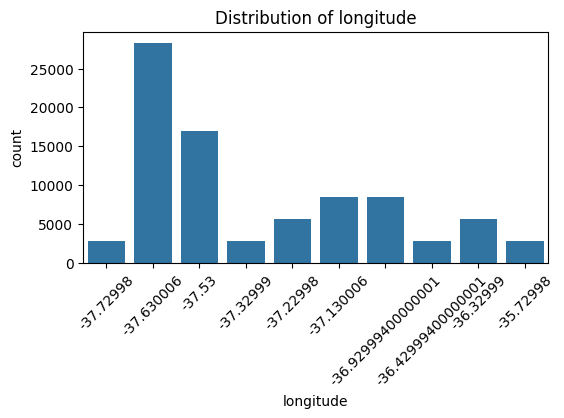


Avg_Temperature (float64): 247 uniques

Avg_Feels_Like_Temperature (float64): 352 uniques

Temperature_Range (float64): 358 uniques

Feels_Like_Temperature_Range (float64): 422 uniques

Radiation (float64): 2364 uniques

Rain_Amount (float64): 734 uniques

Rain_Duration (int64): 25 uniques

Wind_Speed (float64): 443 uniques

Wind_Direction (int64): 360 uniques

Evapotranspiration (float64): 698 uniques

📊 NUMERIC COLUMNS ANALYSIS:

―― ID ――
count    84960.000000
mean     42480.500000
std      24525.983772
min          1.000000
25%      21240.750000
50%      42480.500000
75%      63720.250000
max      84960.000000
Name: ID, dtype: float64


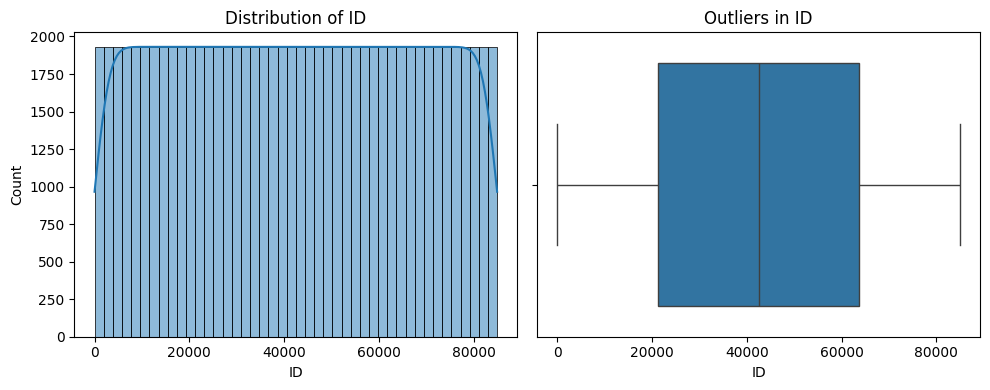


―― Year ――
count    84960.000000
mean         4.610876
std          2.239331
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          8.000000
Name: Year, dtype: float64


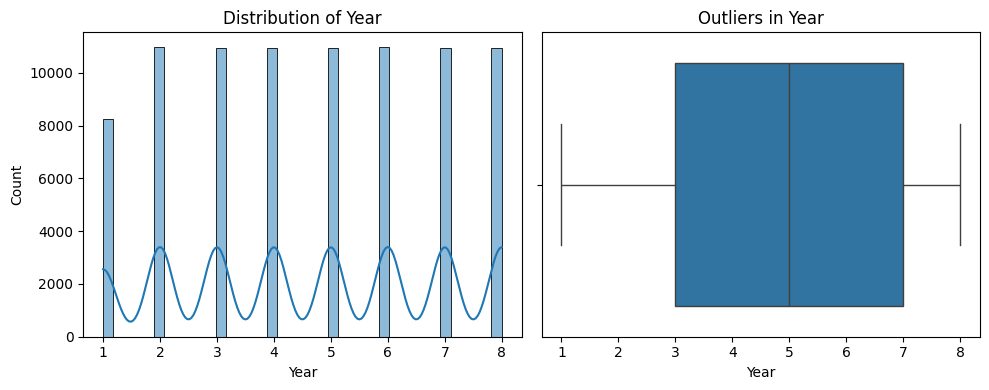


―― Month ――
count    84960.000000
mean         6.666667
std          3.402793
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: Month, dtype: float64


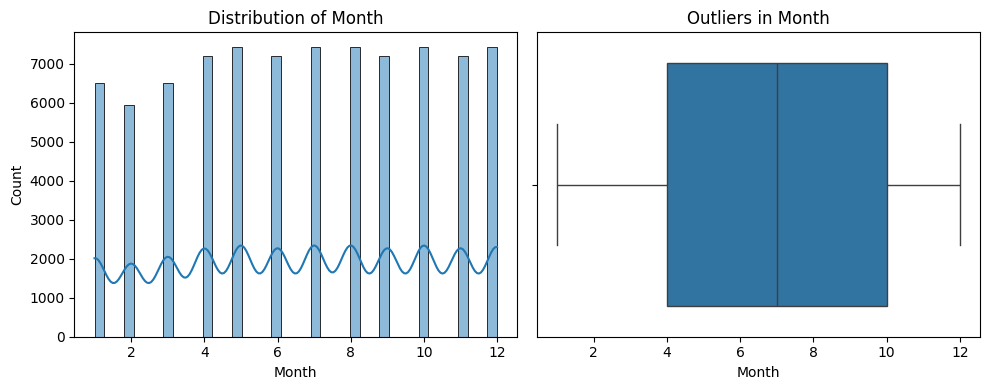


―― Day ――
count    84960.000000
mean        15.735876
std          8.802867
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: Day, dtype: float64


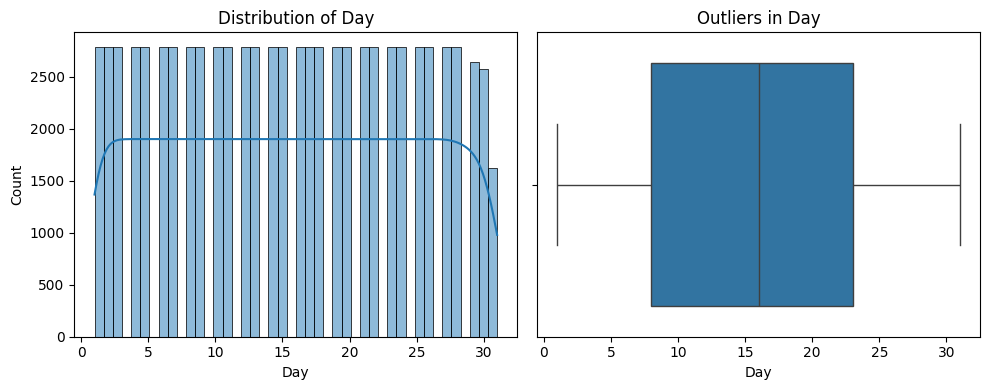


―― latitude ――
count    84960.000000
mean        24.003334
std          0.798622
min         22.880000
25%         23.680003
50%         23.780002
75%         24.280002
max         26.580005
Name: latitude, dtype: float64


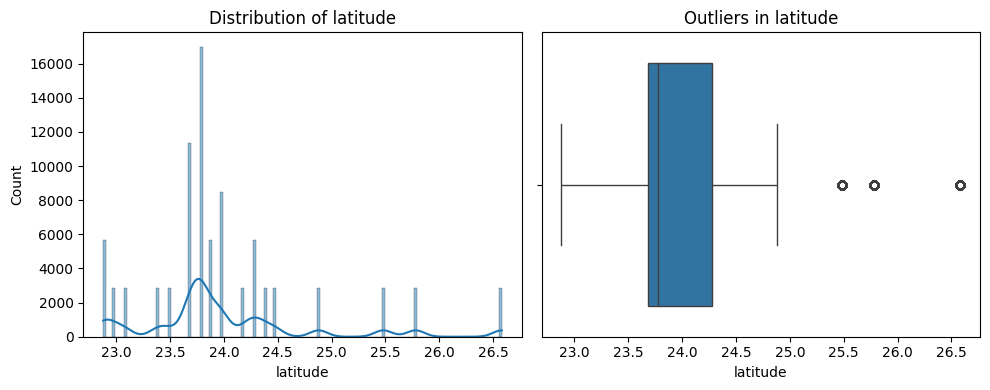


―― longitude ――
count    84960.000000
mean       -37.266665
std          0.488873
min        -37.729980
25%        -37.630006
50%        -37.530000
75%        -37.130006
max        -35.729980
Name: longitude, dtype: float64


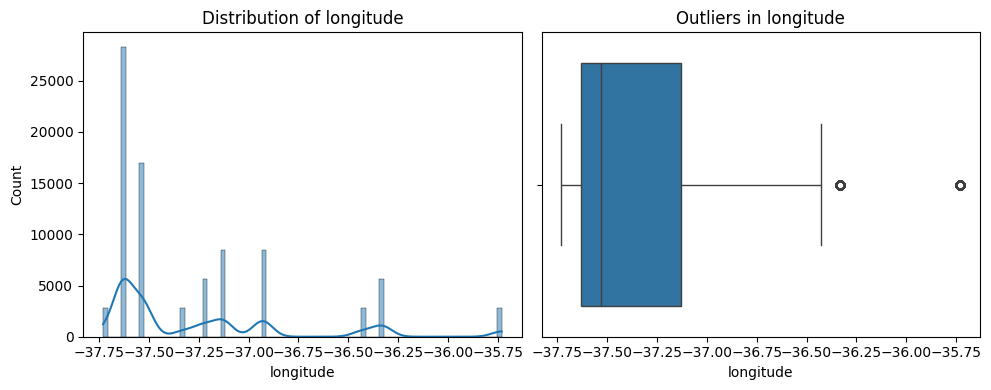


―― Avg_Temperature ――
count    84960.000000
mean       135.600751
std        133.650417
min         18.600000
25%         26.300000
50%         28.100000
75%        299.350000
max        303.650000
Name: Avg_Temperature, dtype: float64


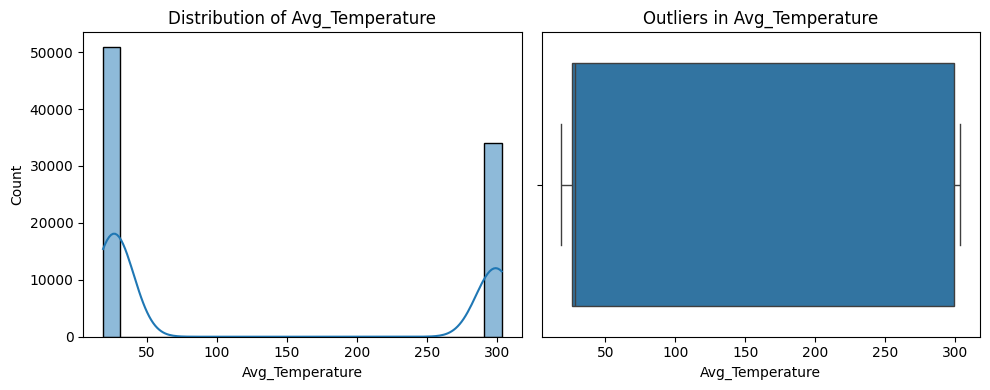


―― Avg_Feels_Like_Temperature ――
count    84960.000000
mean       139.735375
std        133.937168
min         18.700000
25%         30.300000
50%         32.500000
75%        303.850000
max        309.650000
Name: Avg_Feels_Like_Temperature, dtype: float64


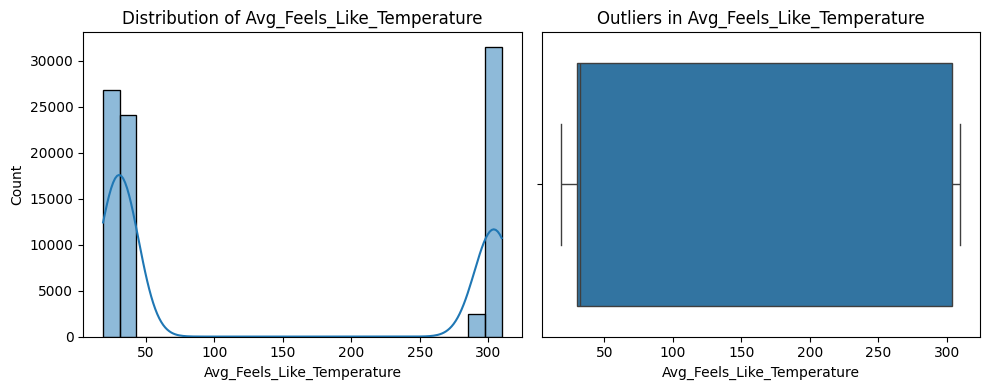


―― Temperature_Range ――
count    84960.000000
mean         5.345287
std          1.977739
min          0.500000
25%          3.800000
50%          5.100000
75%          6.500000
max         15.400000
Name: Temperature_Range, dtype: float64


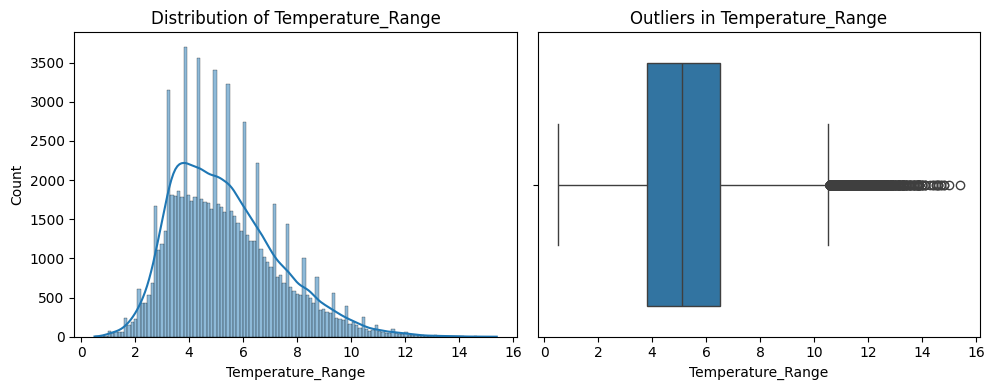


―― Feels_Like_Temperature_Range ――
count    84960.000000
mean         6.361224
std          2.371880
min          0.800000
25%          4.500000
50%          6.200000
75%          8.000000
max         17.300000
Name: Feels_Like_Temperature_Range, dtype: float64


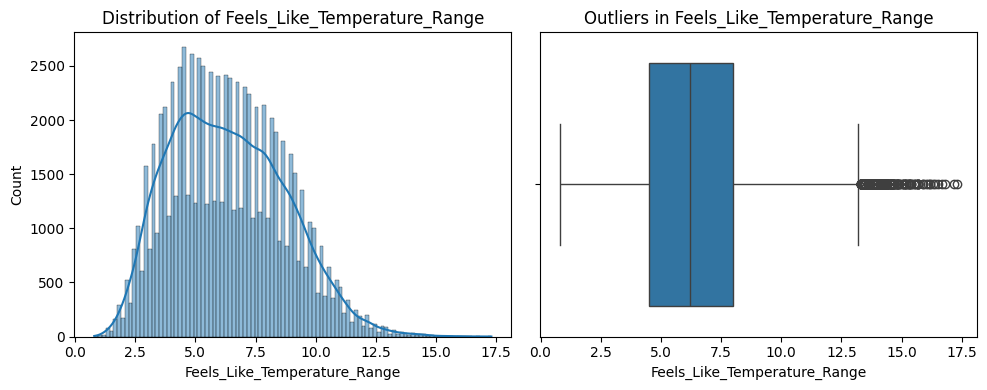


―― Radiation ――
count    84960.000000
mean        20.338598
std          4.118938
min          3.190000
25%         18.070000
50%         20.960000
75%         23.300000
max         30.100000
Name: Radiation, dtype: float64


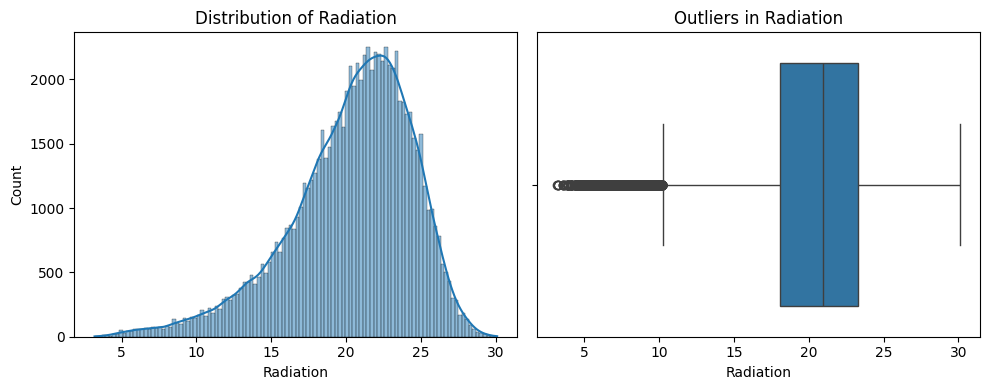


―― Rain_Amount ――
count    84960.000000
mean         7.723850
std         13.477186
min          0.000000
25%          0.520000
50%          3.380000
75%          9.490000
max        440.440000
Name: Rain_Amount, dtype: float64


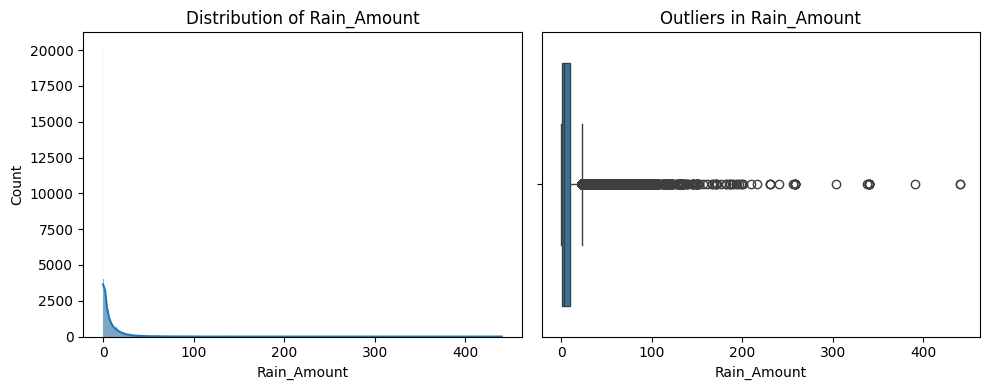


―― Rain_Duration ――
count    84960.000000
mean         8.895680
std          7.231531
min          0.000000
25%          2.000000
50%          8.000000
75%         15.000000
max         24.000000
Name: Rain_Duration, dtype: float64


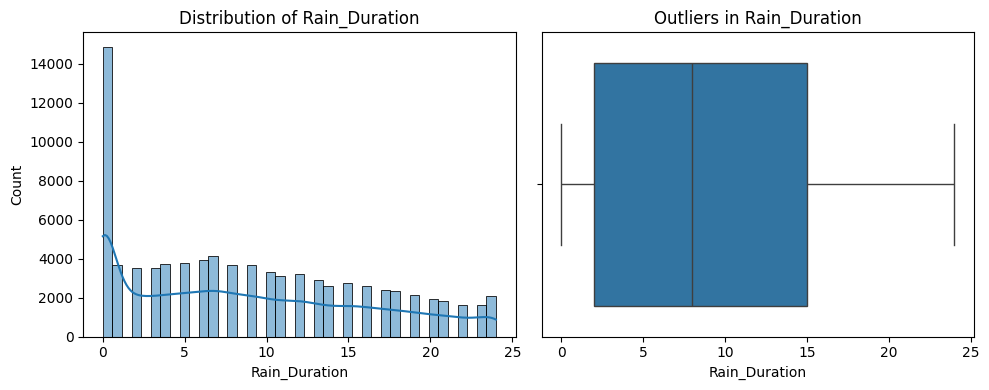


―― Wind_Speed ――
count    84960.000000
mean        15.629291
std          6.198760
min          2.300000
25%         11.100000
50%         15.100000
75%         19.000000
max         50.200000
Name: Wind_Speed, dtype: float64


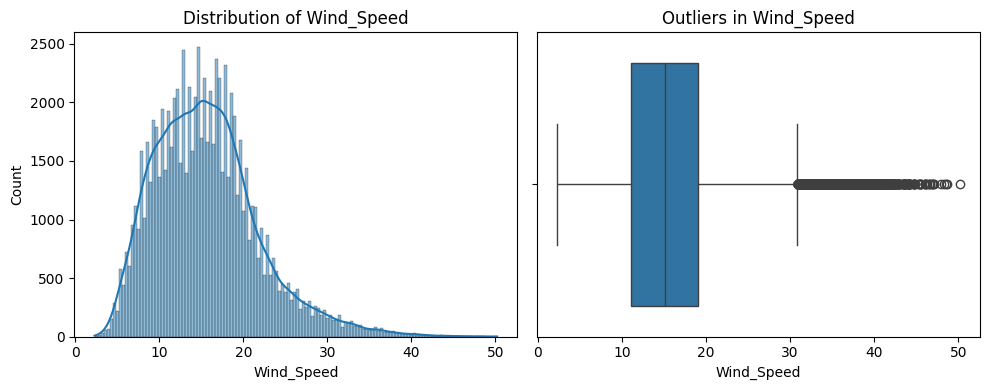


―― Wind_Direction ――
count    84960.000000
mean       215.831297
std         93.917858
min          0.000000
25%        119.000000
50%        255.000000
75%        286.000000
max        359.000000
Name: Wind_Direction, dtype: float64


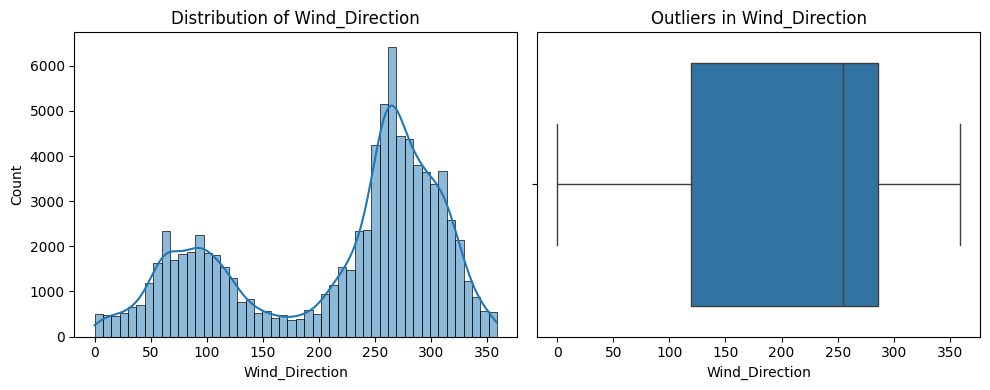


―― Evapotranspiration ――
count    84960.000000
mean         1.568724
std          0.219856
min          0.425268
25%          1.451614
50%          1.589235
75%          1.715598
max          2.212660
Name: Evapotranspiration, dtype: float64


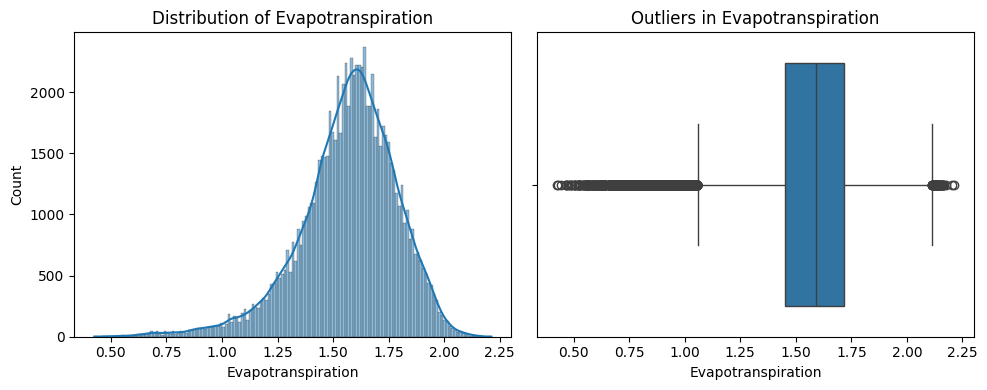


✅ EDA COMPLETE


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def comprehensive_eda(df):
    """Analyze all columns in one shot"""
    print("🔍 ========== STARTING COMPREHENSIVE EDA ==========")
    
    # 1. Basic Info
    print("\n📋 BASIC INFO:")
    print(f"Shape: {df.shape}")
    print(f"\nColumns:\n{df.dtypes}")
    
    # 2. Unique Values Analysis
    print("\n🎯 UNIQUE VALUES PER COLUMN:")
    for col in df.columns:
        nunique = df[col].nunique()
        dtype = df[col].dtype
        print(f"\n{col} ({dtype}): {nunique} uniques")
        
        # Show values for low-cardinality features
        if nunique <= 10:
            print(f"  Values: {sorted(df[col].unique())}")
            if nunique > 1:  # Skip single-value columns
                plt.figure(figsize=(6,3))
                sns.countplot(data=df, x=col)
                plt.title(f'Distribution of {col}')
                plt.xticks(rotation=45)
                plt.show()
    
    # 3. Numeric Columns Deep Dive
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns
    print("\n📊 NUMERIC COLUMNS ANALYSIS:")
    for col in numeric_cols:
        print(f"\n―― {col} ――")
        print(df[col].describe())
        
        # Plot distributions
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f'Outliers in {col}')
        plt.tight_layout()
        plt.show()
        
    # 4. Temporal Analysis (if date exists)
    if 'date' in df.columns:
        print("\n📅 TEMPORAL ANALYSIS:")
        print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
        
        # Plot time series for first numeric column
        num_col = numeric_cols[0]
        plt.figure(figsize=(12,4))
        sns.lineplot(data=df, x='date', y=num_col, hue='kingdom', alpha=0.6)
        plt.title(f'{num_col} Over Time by Kingdom')
        plt.show()

    print("\n✅ EDA COMPLETE")

# Run it on your data
comprehensive_eda(train)

In [ ]:
#Kavishan

In [ ]:
#Daham